<a href="https://colab.research.google.com/github/sanu4satyam/Capstone_Projects/blob/main/Study%20VS%20Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:-** *This project will explore the relationship between hours invested in study and marks obtained by students.*

**Importing various Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [2]:
df = pd.read_csv('/content/Learner_marks_record.csv')

EDA of the Dataset

In [3]:
df.head()

,Hours_to_study,Obtained_Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_to_study  195 non-null    float64
 1   Obtained_Marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,Hours_to_study,Obtained_Marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [7]:
df.isna().sum()

Hours_to_study    5
Obtained_Marks    0
dtype: int64

In [8]:
#Filling Null values with mean

df['Hours_to_study'].fillna(value = df['Hours_to_study'].mean(), inplace= True)

In [9]:
df.isna().sum()

Hours_to_study    0
Obtained_Marks    0
dtype: int64

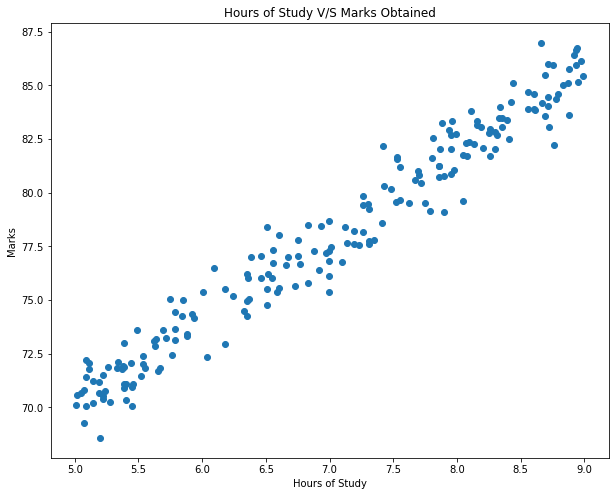

In [10]:
#Plotting the Scatter-plot to find the correlation between the two variables.

plt.figure(figsize=(10,8))
plt.scatter(df['Hours_to_study'], df['Obtained_Marks'])
plt.title("Hours of Study V/S Marks Obtained")
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.show()

Findings from EDA:



*   The dataframe has 200 rows x 2 columns.
*   The dataframe has only 5 null values in Hours_of_study Column which is very less and good to fill with the mean values.
*   There is a positive correlation between Hours of study and Marks Obtained. 



***Applying Regression Models to find out the relationship between Hours of study and Marks obtained.***

*Train Test Split*

In [11]:
X= df['Hours_to_study']
y= df['Obtained_Marks']

In [12]:
X = pd.DataFrame(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


**Linear Regression Modeling**

In [16]:
#Importing Linear Regression Model and applying it.

from sklearn.linear_model import LinearRegression

In [17]:
LR_model = LinearRegression()

In [18]:
#Fitting the Linear Regression Model

LR_model.fit(X_train, y_train)

LinearRegression()

In [19]:
#Saving the predicted result in y_pred variable

y_pred= LR_model.predict(X_test)

In [20]:
print(y_pred)

[83.50836718 70.86017829 72.94202304 85.35453139 73.21698367 84.49036942
 80.13027946 81.85860341 80.91588126 82.21212422 78.99115686 84.84389023
 77.85203426 77.6949139  83.23340655 85.78661238 84.9617305  72.62778232
 78.71619623 79.18755731 84.29396897 85.62949202 74.74890717 81.34796224
 72.03858098 80.40524009 78.99115686 82.09428395 77.95396105 82.25140431
 75.45594878 84.60820969 71.64578008 75.49522887 70.31025703 78.99115686
 75.33810851 84.52964951 74.08114564 71.44937963 76.04515013 81.34796224
 76.04515013 81.70148305 81.70148305 80.79804099 70.86017829 74.19898591
 72.82418277 76.04515013]


In [21]:
#Importing the r2score and finding the r2_score for Linear Regression

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9480602735001381


In [22]:
#Finding the Intercept

LR_model.intercept_

50.47381172067131

In [23]:
#Finding the Coefficient

LR_model.coef_

array([3.92800897])

*Plotting the line to view Actual and Predicted values*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


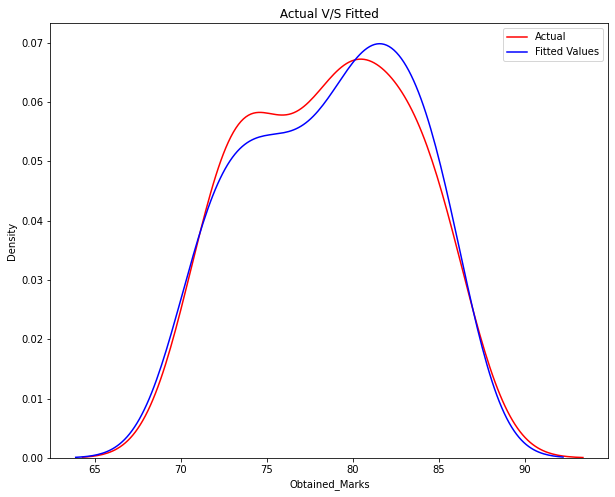

In [24]:
plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test, hist= False, color= "r", label= "Actual")
sns.distplot(y_pred, hist=False, color= "b", label= "Fitted Values", ax= ax1)
plt.title(" Actual V/S Fitted ")
plt.legend()
plt.show()

Finding the Mean Squared Error and Root Mean Squared Error

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("The value of mean squared error is: ", mse, "\nThe value of rooted mean squared error is: ", rmse)

The value of mean squared error is:  1.103553398592666 
The value of rooted mean squared error is:  1.0505014986151453


**KNN Regression Model**

In [26]:
#Importing KNN Regression Model and applying it.

from sklearn.neighbors import KNeighborsRegressor

In [27]:
KNN_model = KNeighborsRegressor(n_neighbors= 3)

In [28]:
#Fitting the KNN Regressor Model

KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [29]:
y_pred1 = LR_model.predict(X_test)

In [30]:
#Finding the r2_score for KNN Regressor Model

print(r2_score(y_test, y_pred1))

0.9480602735001381


**Decision Tree Regressor**

In [31]:
#Importing Decision Tree Regressor Model and applying it.

from sklearn.tree import DecisionTreeRegressor

In [32]:
DTR_model = DecisionTreeRegressor()

In [33]:
#Fitting the Decision Tree Regressor Model

DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred2 = LR_model.predict(X_test)

In [35]:
#Finding the r2_score for Decision Tree Regressor Model

print(r2_score(y_test, y_pred2))

0.9480602735001381


Random Forest Regression

In [36]:
#Importing Random Forest Regression Model and applying it.

from sklearn.ensemble import RandomForestRegressor

In [37]:
RF_model = RandomForestRegressor()

In [38]:
#Fitting the Random Forest Regressor Model

RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred3 = RF_model.predict(X_test)

In [40]:
#Finding the r2_score for Random Forest Regressor Model

print(r2_score(y_test, y_pred3))

0.9098171466609672


**Conclusion:**



*   We can see that the relation between them is linearly correlated.
*   There is a good relation between hours of study invested will get a high marks.
*   The Linear Regressor model is better than other model to show the association. LR models fits best in this situation. 



To be a good student, you must invest a lot of time and energy into your education. But do the hours spent studying really reflect the quality of your work and performance?

In this study we looked at the relationship between hours invested in studying and the marks obtained by student. We found that students who studied longer were more likely to obtain better results.